In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from soul_gan.models.utils import load_gan
from soul_gan.utils.general_utils import DotConfig

import yaml
from yaml import Loader
from pathlib import Path

import torch
import seaborn as sns
from matplotlib import pyplot as plt

from torchvision import transforms

In [3]:
gan_config = yaml.load(Path('../configs/gan_configs/cifar-10-wgan-gp.yml').open('r'), Loader)
gan_config = DotConfig(gan_config['gan_config'])

In [4]:
device = torch.device(0 if torch.cuda.is_available() else 'cpu')

In [5]:
gen, dis = load_gan(gan_config, device=device)

100%|██████████| 500/500 [00:14<00:00, 33.87it/s]


In [6]:
from soul_gan.distribution import estimate_log_norm_constant

In [7]:
estimate_log_norm_constant(gen, dis, 100)

tensor(7.4445, device='cuda:0')

In [15]:
def get_dgz_stat(gen, dis, n_images=1000, batch_size=100, device=0):
    scores = []
    for _ in range(n_images // batch_size):
        z = torch.randn(batch_size, gen.z_dim, device=device)
        scores.extend(dis(gen(z)).view(-1).tolist())

    return scores

In [16]:
scores = get_dgz_stat(gen, dis, device=device)

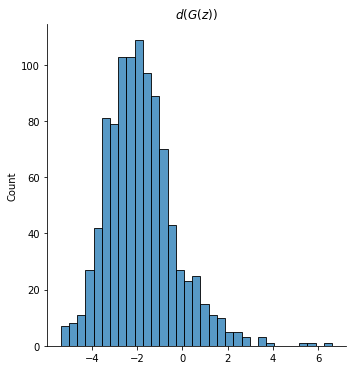

In [19]:
sns.displot(scores)

plt.title(r'$d(G(z))$')

plt.savefig('../figs/gan_stats/wgan-gp_dgz.png')
plt.show()

In [14]:
sns.displot(torch.sigmoid(torch.FloatTensor(scores)).tolist())

plt.title(r'$D(G(z))$')

plt.savefig('../figs/gan_stats/wgan-gp_Dgz.png')
plt.show()

KeyboardInterrupt: 

In [20]:
f"{torch.sigmoid(torch.FloatTensor(scores)).mean().item():.3f}"

'0.202'

In [47]:
z = torch.randn(10, gen.z_dim).to(device)
x = gen(z)

x = (x + 1) / 2
x = x.clamp(0, 1)


In [48]:
# inv_normalize = transforms.Normalize(
#     mean=[-0.5/0.5, -0.5/0.5, -0.5/0.5],
#     std=[1/0.5, 1/0.5, 1/0.5]
# )
# x = inv_normalize(x).detach().cpu().numpy()

x = x.detach().cpu().numpy()

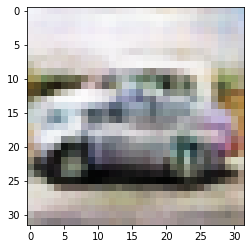

In [49]:
plt.imshow(x[6].transpose(1, 2, 0))